### Import Libraries and Data

In [6]:
import pandas as pd

from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot



In [7]:
file_name = "Brand Performance Raw Data.xlsx"
sheets_dict = pd.read_excel(file_name, engine="openpyxl", sheet_name=None)

market_data = sheets_dict['Market data']

### Autocorrelation

In [9]:
series = market_data[['Date', 'Client Market Size']].copy()
series['Date'] = pd.to_datetime(series['Date'])
series.set_index('Date', inplace=True)
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2020-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Client Market Size  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


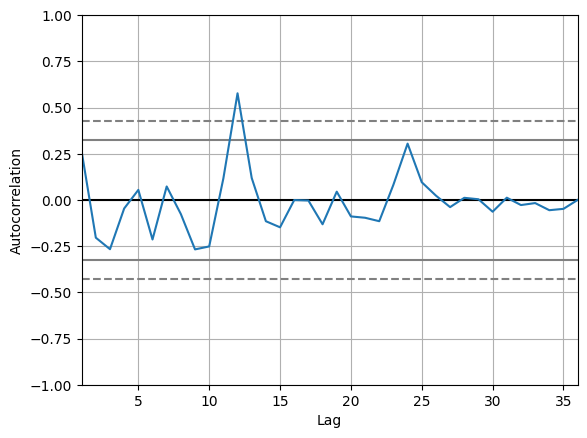

In [10]:
autocorrelation_plot(series)
pyplot.show()

Already the autocorrelation plot is showing that there is not a significant correlation of the market share variable with time.

/Users/shafelmain/Documents/case_study_submission/.venv /lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/shafelmain/Documents/case_study_submission/.venv /lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/shafelmain/Documents/case_study_submission/.venv /lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/shafelmain/Documents/case_study_submission/.venv /lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary

                               SARIMAX Results                                
Dep. Variable:     Client Market Size   No. Observations:                   36
Model:                ARIMA(12, 1, 0)   Log Likelihood                -682.058
Date:                Sat, 01 Feb 2025   AIC                           1390.116
Time:                        15:26:06   BIC                           1410.335
Sample:                    01-01-2020   HQIC                          1397.096
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0227      0.031      0.739      0.460      -0.038       0.083
ar.L2         -0.1986      0.031     -6.507      0.000      -0.258      -0.139
ar.L3         -0.0572      0.028     -2.076      0.0

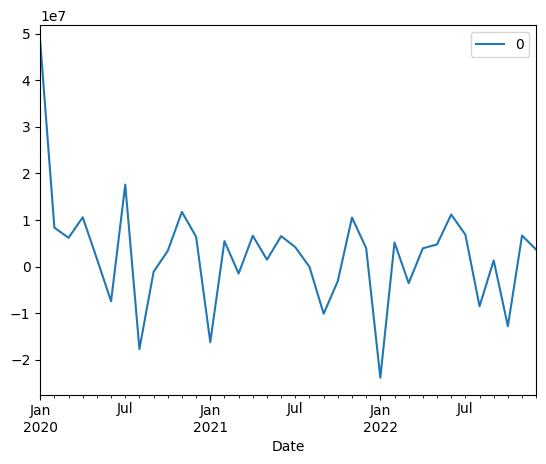

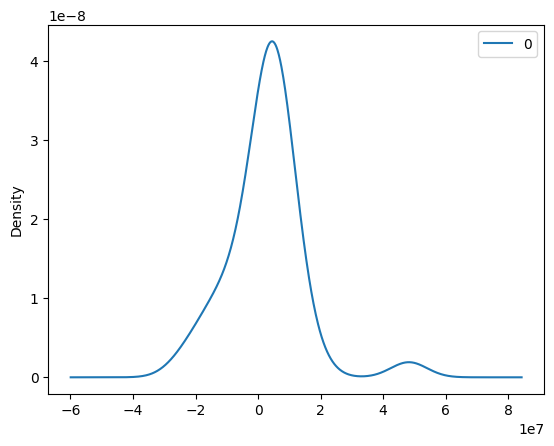

                  0
count  3.600000e+01
mean   2.494646e+06
std    1.188868e+07
min   -2.386855e+07
25%   -1.912779e+06
50%    3.926101e+06
75%    6.612337e+06
max    4.823800e+07


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

#series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(12,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

These results imply that the revenue data is affected by as much as a year before (12 periods). However, given the small sample size, I would not go forward with these results.

/Users/shafelmain/Documents/case_study_submission/.venv /lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/var/folders/df/fys646cx6yx4zndbvy6qz28h0000gn/T/ipykernel_12159/3315716885.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=73413031.610915, expected=75848310.000000
predicted=75848302.703086, expected=47675899.000000
predicted=47675880.723492, expected=49449361.000000
predicted=58040348.501747, expected=51055995.000000
predicted=54542927.316680, expected=58689504.000000
predicted=53666579.441781, expected=60156222.000000
predicted=53122289.044924, expected=67942705.000000
predicted=67473191.988628, expected=77061873.000000
predicted=70074170.953276, expected=59491330.000000
predicted=61026341.247129, expected=61761946.000000
predicted=72513160.374026, expected=56288727.000000
predicted=59443653.080166, expected=68837779.000000
predicted=66089040.111715, expected=71121066.000000
Test RMSE: 11474986.812


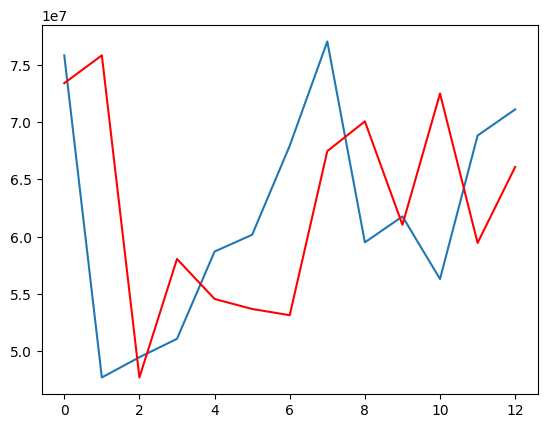

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt


X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

order : tuple, optional. The (p,d,q) order of the model for the autoregressive, differences, and moving average components. d is always an integer, while p and q may either be integers or lists of integers.

In [16]:
import numpy as np

df = pd.DataFrame(predictions, columns=['Predictions'])
df['Date'] = pd.date_range(start="2023-01-01",end="2024-01-01", freq='MS')
pd.set_option('display.float_format', '{:.12f}'.format)
df

,Predictions,Date
0,73413031.610914915800,2023-01-01
1,75848302.703085511923,2023-02-01
2,47675880.723491974175,2023-03-01
3,58040348.501746945083,2023-04-01
4,54542927.316679902375,2023-05-01
5,53666579.441780753434,2023-06-01
6,53122289.044924177229,2023-07-01
7,67473191.988627880812,2023-08-01
8,70074170.953276261687,2023-09-01
9,61026341.247129455209,2023-10-01


In [14]:
Total = df['Predictions'].sum()
print(Total)

812928917.0975647
